Glaustas darbas įvertinimui, taip pat yra įkeltas ir kitas darbas su visais bandymais ir eksperimentais.

In [154]:
import gzip
import numpy as np
import pickle
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

In [155]:
path = 'flatland_train.data' 
X, y = pickle.load(gzip.open(path, 'rb'))
y[y != 0] -= 2 
X = X / 255. 

In [156]:
X.shape

(10000, 50, 50)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [158]:
X_train.shape

(7500, 50, 50)

In [159]:
X_test.shape

(2500, 50, 50)

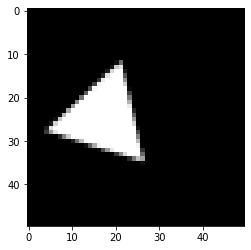

In [160]:
plt.imshow(X_test[0],cmap='gray')

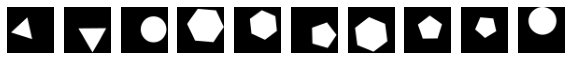

In [161]:
plt.figure(figsize=(10, 10))
for i in range(10):
        plt.subplot(10, 10, 10 + i + 1)
        plt.imshow(X_test[i], cmap='gray')
        plt.axis('off')
plt.show()

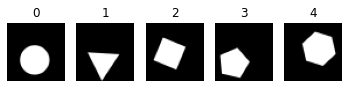

In [162]:
for i in range(5):
    idx= np.where(y_train == i)[0][0]
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[idx],cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()

In [163]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_103 (Ba  (None, 48, 48, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 24, 24, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_104 (Ba  (None, 22, 22, 32)       128       
 tchNormalization)                                               
                                                     

In [164]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
235/235 [==============================] - 4s 12ms/step - loss: 0.9724 - accuracy: 0.6285 - val_loss: 3.7418 - val_accuracy: 0.1516
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2991 - accuracy: 0.9168 - val_loss: 3.5366 - val_accuracy: 0.1532
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1834 - accuracy: 0.9599 - val_loss: 0.3981 - val_accuracy: 0.8708
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1433 - accuracy: 0.9707 - val_loss: 0.2141 - val_accuracy: 0.9652
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1147 - accuracy: 0.9748 - val_loss: 0.1795 - val_accuracy: 0.9676
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0914 - accuracy: 0.9807 - val_loss: 0.2210 - val_accuracy: 0.9552
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0802 - accuracy: 0.9807 - val_loss: 0.2187 - val_accuracy: 0.9636

In [168]:
pred = model.predict(X_test).argmax(axis=1)

print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 97.48%


In [169]:
model.save('modelis.h5')

In [170]:
model = keras.models.load_model('modelis.h5')
evaluate('flatland_train.data', model)

0.9872